## Machine Learning Project

dataset: Loan Default Dataset <https://www.kaggle.com/datasets/yasserh/loan-default-dataset/data>

__Features Description:__

__ID:__ Unique identifier for each loan record.
__year:__ Year of loan issuance.
__loan_limit:__ Loan limit category.
__Gender:__ Loan applicant gender.
__approv_in_adv:__ Indicates whether the loan has been pre-approved.
__loan_type:__ Type of loan.
__loan_purpose:__ Purpose of the loan.
__Credit_Worthiness:__ The extent to which a person or company is considered suitable for receiving financial credit is often based on its reliability in repaying money in the past.
__open_credit:__ Indicates whether the applicant has other open credits.
__business_or_commercial:__ Whether the loan is for business or commercial.
__loan_amount:__ Total loan amount.
__rate_of_interest:__ Loan interest rate.
__Interest_rate_spread:__ Interest rate differential relative to a benchmark index.
__Upfront_charges:__ Initial charges for the loan.
__term:__ Loan duration in months.
__Neg_ammortization:__ Indicates whether there is negative amortization.
__interest_only:__ Whether the loan allows for interest-only payments.
__lump_sum_payment:__ Indicates whether there is an option to pay in a single installment.
__property_value:__ Value of the property associated with the loan.
__construction_type:__ Type of construction of the property.
__occupancy_type:__ Type of property occupancy.
__Secured_by:__ Type of loan guarantee.
__total_units:__ Number of units related to the loan.
__income:__ Loan applicant's income.
__credit_type:__ Type of credit check used.
__Credit_Score:__ Applicant's credit score.
__co-applicant_credit_type:__ Type of credit check for co-applicants.
__age:__ Age range of the applicant.
__submission_of_application:__ Loan application submission method.
__LTV (Loan to Value):__ Ratio of loan amount to property value.
__Region:__ Geographic region of the loan.
__Security_Type:__ Type of loan security.
__Status:__ Loan Status (1 loan granted, 0 not granted)
__dtir1 (Debt to Income Ratio):__ Debt/income ratio of the applicant.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
from sklearn.impute import SimpleImputer

In [2]:
# Open dataset
df = pd.read_csv("Loan_Default.csv")

In [3]:
# First 5 dataset rows
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
# Last 5 dataset rows
df.tail()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0
148669,173559,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,...,CIB,830,CIB,45-54,not_inst,72.849462,North,direct,0,44.0


In [5]:
# Data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
# Data shape
df.shape

(148670, 34)

In [7]:
# statistics
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [8]:
# To show all features
pd.set_option("display.max_columns", df.shape[-1]) 
df.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


Credit factors according to Forbes.com (https://www.forbes.com/advisor/personal-loans/personal-loan-requirements/):

- Credit Score and History
- Income
- Debt-to-income Ratio
- Collateral
- Origination Fee

In [9]:
# Excluding features

df.drop(['loan_limit','Gender', 'approv_in_adv','loan_type', 'loan_purpose', 'Credit_Worthiness','open_credit',
        'business_or_commercial', 'rate_of_interest', 'Interest_rate_spread', 'Neg_ammortization', 'interest_only',
        'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type',
        'co-applicant_credit_type', 'submission_of_application', 'Region', 'Security_Type'], axis = 1, inplace = True)

In [10]:
# Column names
df.head()

,ID,year,loan_amount,Upfront_charges,term,property_value,income,Credit_Score,age,LTV,Status,dtir1
0,24890,2019,116500,NaN,360.0,118000.0,1740.0,758,25-34,98.728814,1,45.0
1,24891,2019,206500,NaN,360.0,NaN,4980.0,552,55-64,NaN,1,NaN
2,24892,2019,406500,595.0,360.0,508000.0,9480.0,834,35-44,80.019685,0,46.0
3,24893,2019,456500,NaN,360.0,658000.0,11880.0,587,45-54,69.376900,0,42.0
4,24894,2019,696500,0.0,360.0,758000.0,10440.0,602,25-34,91.886544,0,39.0


<Axes: >

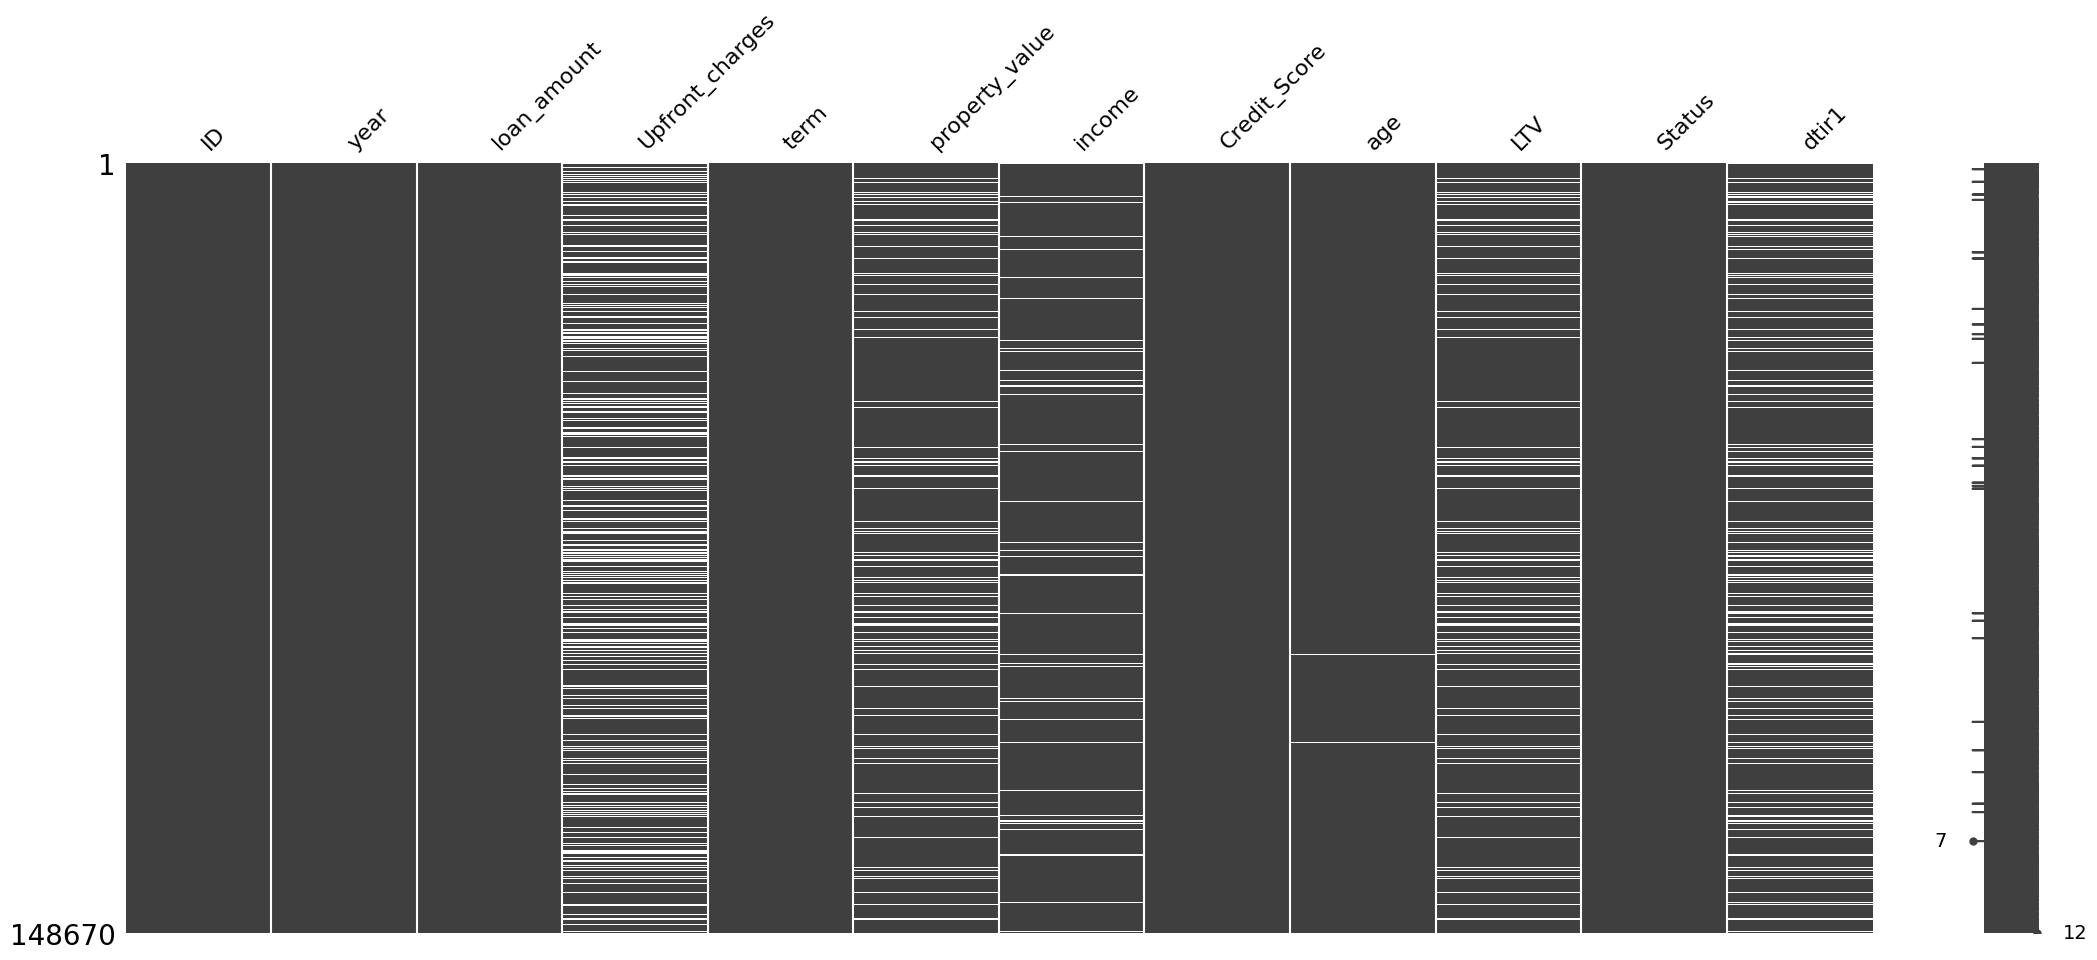

In [11]:
# Ploting missing data

msno.matrix(df)

In [12]:
# Missing data
df.isnull().sum()

ID                     0
year                   0
loan_amount            0
Upfront_charges    39642
term                  41
property_value     15098
income              9150
Credit_Score           0
age                  200
LTV                15098
Status                 0
dtir1              24121
dtype: int64

In [13]:
# Missing values percent
def miss_val_summary(df):
    total = df.shape[0]
    miss_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    miss_percent = {}
    for col in miss_columns:
        null_count = df[col].isnull().sum()
        percent = (null_count/total) * 100
        miss_percent[col] = percent
        print("{} : {} ({}%)".format(col, null_count, round(percent, 3)))
    return miss_percent

In [14]:
miss_percent = miss_val_summary(df)

Upfront_charges : 39642 (26.664%)
term : 41 (0.028%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


Os dados categóricos e com missing values serão tratados a *posteriori*.

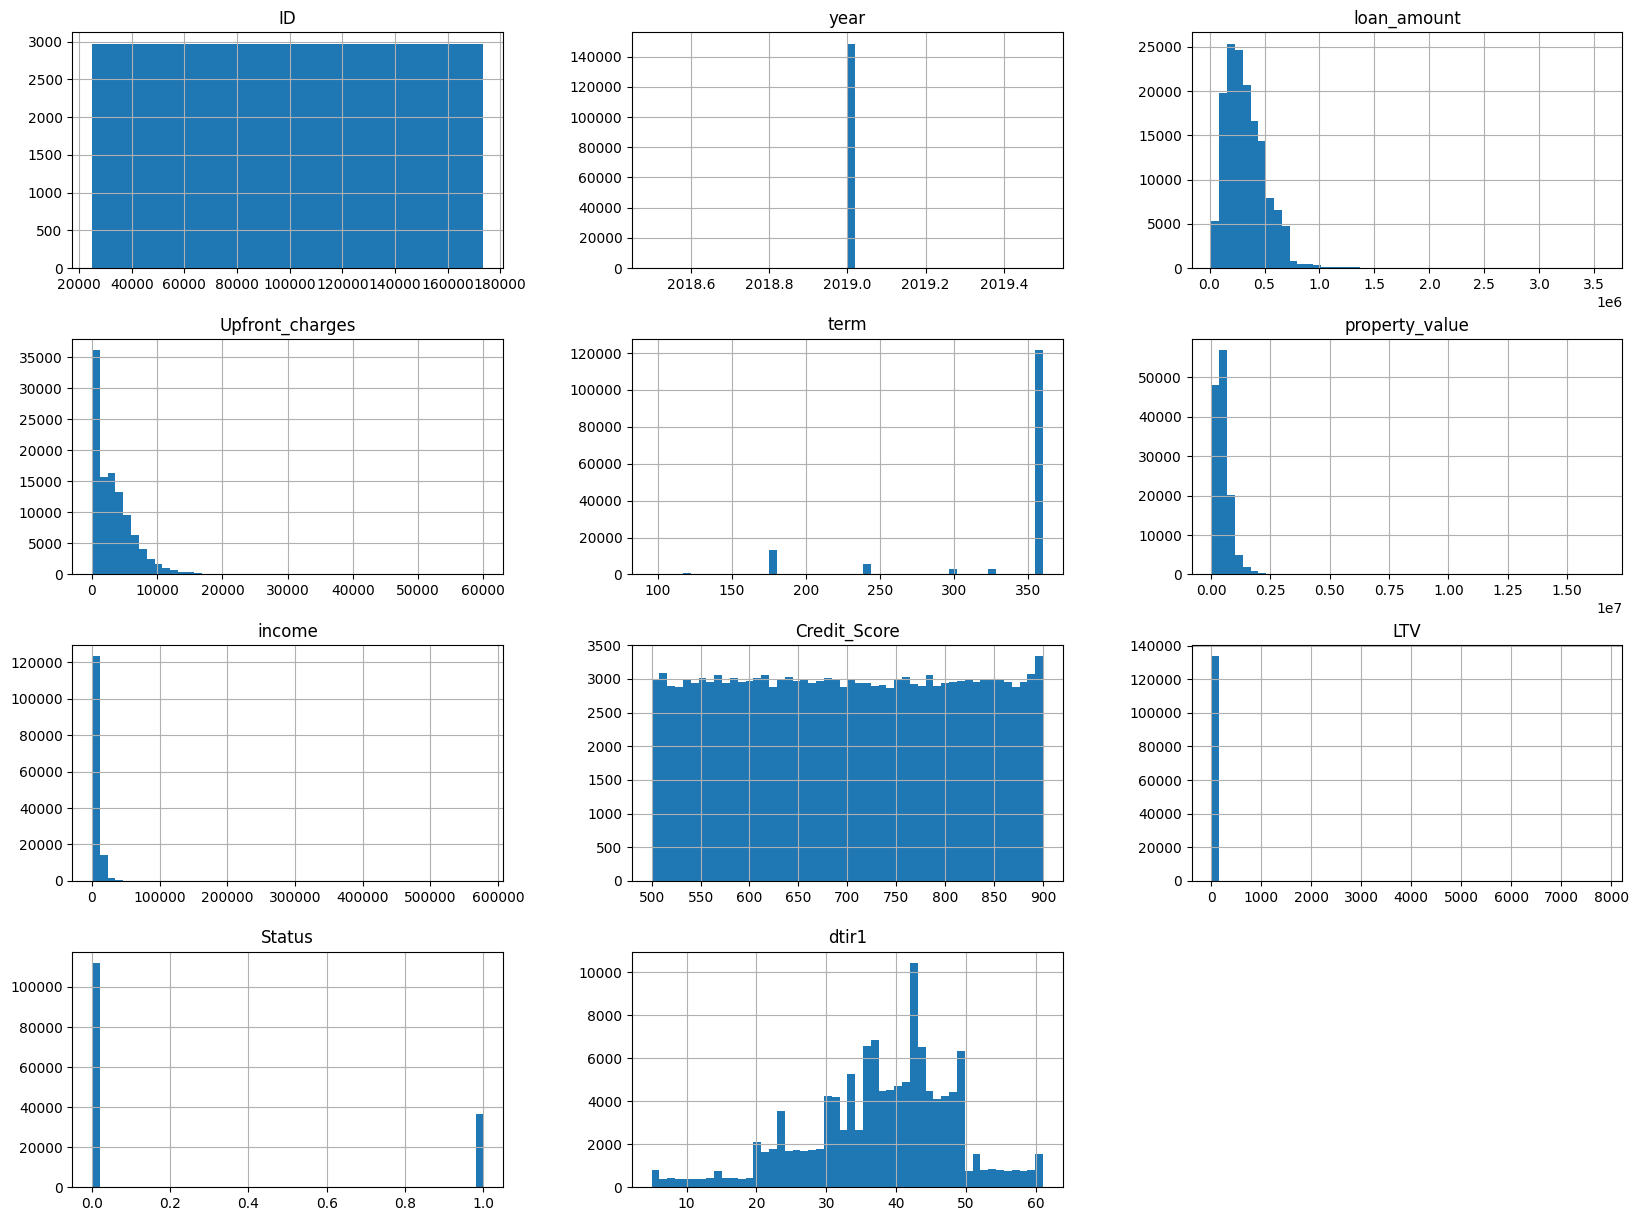

In [15]:
# Numerical data histogram
df.hist(bins = 50, figsize = (20, 15))
plt.show()

In [16]:
# Only numerical features
df_num = df.copy()
num_cols = [col for col in df_num.columns if df_num[col].dtype != 'object']
print(num_cols)
df_num = df_num[num_cols]
df_num.shape
df_num.head()

['ID', 'year', 'loan_amount', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


,ID,year,loan_amount,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,24890,2019,116500,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,24891,2019,206500,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,24892,2019,406500,595.0,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,24893,2019,456500,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,24894,2019,696500,0.0,360.0,758000.0,10440.0,602,91.886544,0,39.0


In [17]:
# Numerical Features Correlations

corr_matrix = df_num.corr()
corr_matrix['Status'].sort_values(ascending = False)

Status             1.000000
dtir1              0.078083
LTV                0.038895
Credit_Score       0.004004
ID                 0.001703
term              -0.000240
Upfront_charges   -0.019138
loan_amount       -0.036825
property_value    -0.048864
income            -0.065119
year                    NaN
Name: Status, dtype: float64

In [18]:
df_num.head(10)

,ID,year,loan_amount,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,24890,2019,116500,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,24891,2019,206500,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,24892,2019,406500,595.00,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,24893,2019,456500,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,24894,2019,696500,0.00,360.0,758000.0,10440.0,602,91.886544,0,39.0
5,24895,2019,706500,370.00,360.0,1008000.0,10080.0,864,70.089286,0,40.0
6,24896,2019,346500,5120.00,360.0,438000.0,5040.0,860,79.109589,0,44.0
7,24897,2019,266500,5609.88,360.0,308000.0,3780.0,863,86.525974,0,42.0
8,24898,2019,376500,1150.00,360.0,478000.0,5580.0,580,78.765690,0,44.0
9,24899,2019,436500,2316.50,360.0,688000.0,6720.0,788,63.444767,0,30.0


In [19]:
# Looking into the numerical features
df_num.describe()

,ID,year,loan_amount,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [20]:
# Looking into the numerical features with missing values
df_num.isnull().sum()

ID                     0
year                   0
loan_amount            0
Upfront_charges    39642
term                  41
property_value     15098
income              9150
Credit_Score           0
LTV                15098
Status                 0
dtir1              24121
dtype: int64

In [21]:
# Replacing numerical missing values using SimpleImputer

In [22]:
# Using the mean value to replace missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df_num)

In [23]:
pd_num_imputed = pd.DataFrame(X, columns = df_num.columns)

In [24]:
pd_num_imputed.head()

,ID,year,loan_amount,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,24890.0,2019.0,116500.0,3224.996127,360.0,118000.000000,1740.0,758.0,98.728814,1.0,45.000000
1,24891.0,2019.0,206500.0,3224.996127,360.0,497893.465696,4980.0,552.0,72.746457,1.0,37.732932
2,24892.0,2019.0,406500.0,595.000000,360.0,508000.000000,9480.0,834.0,80.019685,0.0,46.000000
3,24893.0,2019.0,456500.0,3224.996127,360.0,658000.000000,11880.0,587.0,69.376900,0.0,42.000000
4,24894.0,2019.0,696500.0,0.000000,360.0,758000.000000,10440.0,602.0,91.886544,0.0,39.000000


In [25]:
pd_num_imputed.isnull().sum()

ID                 0
year               0
loan_amount        0
Upfront_charges    0
term               0
property_value     0
income             0
Credit_Score       0
LTV                0
Status             0
dtir1              0
dtype: int64

In [26]:
# Only categorical variables

obj=[]
for i in df.columns:
    if df[i].dtype=='object':
        obj.append(i)
obj

['age']

In [27]:
# Categorical variables values

for i in range(len(obj)):
    print(obj[i],df[obj[i]].unique())

age ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]


In [28]:
# Looking into the categorical features with missing values
df[obj].isnull().sum()

age    200
dtype: int64

In [29]:
df_cat = df[obj]
df_cat.head()

,age
0,25-34
1,55-64
2,35-44
3,45-54
4,25-34


In [30]:
# status value count
df['Status'].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

In [31]:
new_df = df_cat.join(pd_num_imputed)

In [32]:
new_df.head()

,age,ID,year,loan_amount,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,25-34,24890.0,2019.0,116500.0,3224.996127,360.0,118000.000000,1740.0,758.0,98.728814,1.0,45.000000
1,55-64,24891.0,2019.0,206500.0,3224.996127,360.0,497893.465696,4980.0,552.0,72.746457,1.0,37.732932
2,35-44,24892.0,2019.0,406500.0,595.000000,360.0,508000.000000,9480.0,834.0,80.019685,0.0,46.000000
3,45-54,24893.0,2019.0,456500.0,3224.996127,360.0,658000.000000,11880.0,587.0,69.376900,0.0,42.000000
4,25-34,24894.0,2019.0,696500.0,0.000000,360.0,758000.000000,10440.0,602.0,91.886544,0.0,39.000000


In [33]:
new_df.isnull().sum()

age                200
ID                   0
year                 0
loan_amount          0
Upfront_charges      0
term                 0
property_value       0
income               0
Credit_Score         0
LTV                  0
Status               0
dtir1                0
dtype: int64

In [34]:
# removing the rows with missing categorical data
new_df = new_df.dropna()

In [35]:
new_df['Status'].value_counts()

Status
0.0    112031
1.0     36439
Name: count, dtype: int64

In [36]:
new_df.isnull().sum()

age                0
ID                 0
year               0
loan_amount        0
Upfront_charges    0
term               0
property_value     0
income             0
Credit_Score       0
LTV                0
Status             0
dtir1              0
dtype: int64

In [37]:
# Only categorical variables

obj=[]
for i in new_df.columns:
    if df[i].dtype=='object':
        obj.append(i)
obj

['age']

In [38]:
# Categorical variables values

for i in range(len(obj)):
    print(obj[i],new_df[obj[i]].unique())

age ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25']


In [39]:
new_df_cat = new_df[obj]

In [40]:
new_df_cat.head()

,age
0,25-34
1,55-64
2,35-44
3,45-54
4,25-34


In [41]:
new_df_cat.isnull().sum()

age    0
dtype: int64

In [42]:
# Using get_dummies on categorical variables
new_df = pd.get_dummies(new_df, columns = new_df_cat.columns, dtype = float)
new_df

,ID,year,loan_amount,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,24890.0,2019.0,116500.0,3224.996127,360.0,118000.000000,1740.0,758.0,98.728814,1.0,45.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24891.0,2019.0,206500.0,3224.996127,360.0,497893.465696,4980.0,552.0,72.746457,1.0,37.732932,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,24892.0,2019.0,406500.0,595.000000,360.0,508000.000000,9480.0,834.0,80.019685,0.0,46.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,24893.0,2019.0,456500.0,3224.996127,360.0,658000.000000,11880.0,587.0,69.376900,0.0,42.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24894.0,2019.0,696500.0,0.000000,360.0,758000.000000,10440.0,602.0,91.886544,0.0,39.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555.0,2019.0,436500.0,9960.000000,180.0,608000.000000,7860.0,659.0,71.792763,0.0,48.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
148666,173556.0,2019.0,586500.0,0.000000,360.0,788000.000000,7140.0,569.0,74.428934,0.0,15.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
148667,173557.0,2019.0,446500.0,1226.640000,180.0,728000.000000,6900.0,702.0,61.332418,0.0,49.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
148668,173558.0,2019.0,196500.0,4323.330000,180.0,278000.000000,7140.0,737.0,70.683453,0.0,29.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
new_df.columns

Index(['ID', 'year', 'loan_amount', 'Upfront_charges', 'term',
       'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1',
       'age_25-34', 'age_35-44', 'age_45-54', 'age_55-64', 'age_65-74',
       'age_<25', 'age_>74'],
      dtype='object')

In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148470 entries, 0 to 148669
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               148470 non-null  float64
 1   year             148470 non-null  float64
 2   loan_amount      148470 non-null  float64
 3   Upfront_charges  148470 non-null  float64
 4   term             148470 non-null  float64
 5   property_value   148470 non-null  float64
 6   income           148470 non-null  float64
 7   Credit_Score     148470 non-null  float64
 8   LTV              148470 non-null  float64
 9   Status           148470 non-null  float64
 10  dtir1            148470 non-null  float64
 11  age_25-34        148470 non-null  float64
 12  age_35-44        148470 non-null  float64
 13  age_45-54        148470 non-null  float64
 14  age_55-64        148470 non-null  float64
 15  age_65-74        148470 non-null  float64
 16  age_<25          148470 non-null  float64
 

In [45]:
new_df = new_df.copy()
new_df = new_df.drop(['year', 'ID'], axis = 1)

# ML algorithms

In [46]:
### Split into training and validation set
from sklearn.model_selection import StratifiedKFold, train_test_split

y = new_df["Status"]

X = new_df.drop(["Status"], axis=1)

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.20, shuffle = True, stratify = y, random_state = 0)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

### First model: Decision Tree
from sklearn.tree import DecisionTreeClassifier
### Model fit
tree = DecisionTreeClassifier()
tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [47]:
train_X.shape

(118776, 15)

In [48]:
train_y.shape

(118776,)

In [49]:
val_X.shape

(29694, 15)

In [50]:
val_y.shape

(29694,)

In [51]:
### Model prediction
predict = tree.predict(val_X)
predict

array([0., 0., 0., ..., 1., 0., 0.])

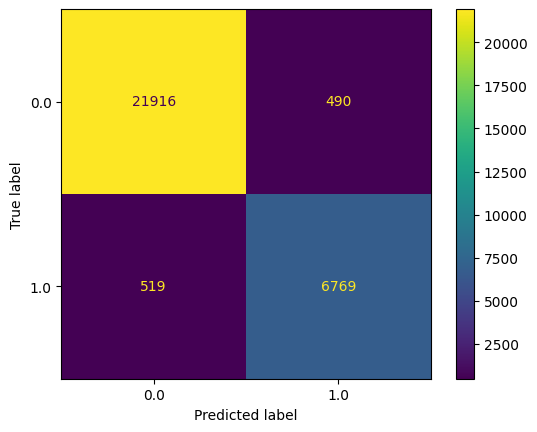

Model Metrics:
Accuracy:  0.9660200713948945
Precision:  0.9324975891996142
Recall:  0.9287870472008781
F1 score:  0.9306386196466625


In [52]:
# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report
conf_mat = confusion_matrix(val_y, predict)

# Decision Tree metrics
ConfusionMatrixDisplay.from_predictions(val_y, predict)
plt.show()
print("Model Metrics:")
print("Accuracy: ", accuracy_score(val_y, predict))
print("Precision: ", precision_score(val_y, predict))
print("Recall: ", recall_score(val_y, predict))
print("F1 score: ", f1_score(val_y, predict))

In [53]:
### Second model: Random Forest
from sklearn.ensemble import RandomForestClassifier
### Model fit
rf = RandomForestClassifier()
rf.fit(train_X, train_y)

RandomForestClassifier()

In [54]:
### Model prediction
predict_2 = rf.predict(val_X)
predict_2

array([0., 0., 0., ..., 1., 0., 0.])

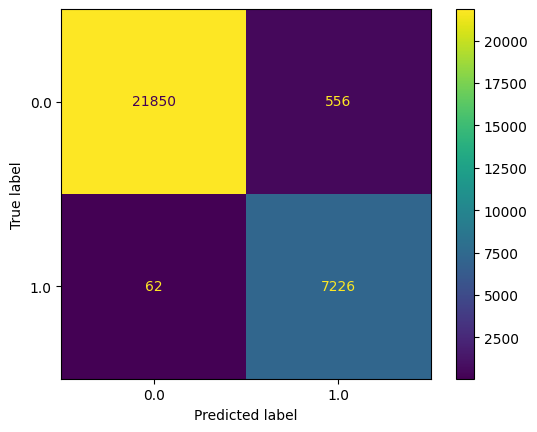

Model Metrics:
Accuracy:  0.9791877146898363
Precision:  0.9285530711899255
Recall:  0.9914928649835346
F1 score:  0.9589913735899137


In [55]:
# Random Forest metrics
ConfusionMatrixDisplay.from_predictions(val_y, predict_2)
plt.show()
print("Model Metrics:")
print("Accuracy: ", accuracy_score(val_y, predict_2))
print("Precision: ", precision_score(val_y, predict_2))
print("Recall: ", recall_score(val_y, predict_2))
print("F1 score: ", f1_score(val_y, predict_2))

In [56]:
# Third model:Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(train_X, train_y)

C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
### Model prediction
predict_3 = lr.predict(val_X)
predict_3

array([0., 0., 0., ..., 0., 0., 0.])

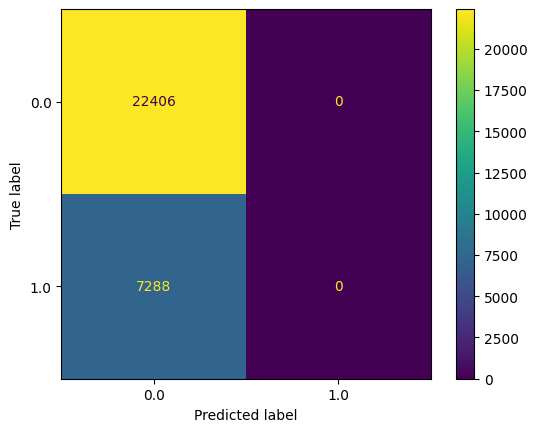

Model Metrics:
Accuracy:  0.7545632114231832
Precision:  0.0
Recall:  0.0
F1 score:  0.0


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
# Logistic Regression metrics
ConfusionMatrixDisplay.from_predictions(val_y, predict_3)
plt.show()
print("Model Metrics:")
print("Accuracy: ", accuracy_score(val_y, predict_3))
print("Precision: ", precision_score(val_y, predict_3))
print("Recall: ", recall_score(val_y, predict_3))
print("F1 score: ", f1_score(val_y, predict_3))

In [59]:
### Fourth model: Neural Networks
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(random_state=0)

nn.fit(train_X, train_y)

MLPClassifier(random_state=0)

In [60]:
### Model prediction
predict_4 = nn.predict(val_X)
predict_4

array([1., 1., 0., ..., 1., 0., 0.])

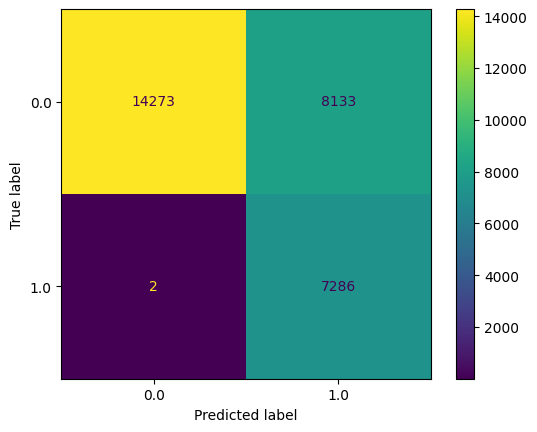

Model Metrics:
Accuracy:  0.7260389304236546
Precision:  0.4725338867630845
Recall:  0.9997255762897914
F1 score:  0.6417404324657594


In [61]:
# Neural networks metrics
ConfusionMatrixDisplay.from_predictions(val_y, predict_4)
plt.show()
print("Model Metrics:")
print("Accuracy: ", accuracy_score(val_y, predict_4))
print("Precision: ", precision_score(val_y, predict_4))
print("Recall: ", recall_score(val_y, predict_4))
print("F1 score: ", f1_score(val_y, predict_4))

## Model Fine-Tune

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
# Testing other params
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [2, 4, 6],
    'bootstrap': [True, False],
}

forest_class = RandomForestClassifier()

grid_search = GridSearchCV(forest_class, param_grid, cv=5,
                          scoring = 'accuracy', verbose = 2, n_jobs = -1)

grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_features': [2, 4, 6],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [64]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

0.9890583162263784 {'bootstrap': True, 'max_features': 2, 'n_estimators': 50}
0.9893817328141781 {'bootstrap': True, 'max_features': 2, 'n_estimators': 100}
0.9894710776481969 {'bootstrap': True, 'max_features': 2, 'n_estimators': 200}
0.9897475742264916 {'bootstrap': True, 'max_features': 4, 'n_estimators': 50}
0.989832636210729 {'bootstrap': True, 'max_features': 4, 'n_estimators': 100}
0.9898411412194175 {'bootstrap': True, 'max_features': 4, 'n_estimators': 200}
0.9897348169123185 {'bootstrap': True, 'max_features': 6, 'n_estimators': 50}
0.9897943593656771 {'bootstrap': True, 'max_features': 6, 'n_estimators': 100}
0.9898156247209283 {'bootstrap': True, 'max_features': 6, 'n_estimators': 200}
0.9886964725296081 {'bootstrap': False, 'max_features': 2, 'n_estimators': 50}
0.9889561615481794 {'bootstrap': False, 'max_features': 2, 'n_estimators': 100}
0.9889731890760001 {'bootstrap': False, 'max_features': 2, 'n_estimators': 200}
0.9893689682751986 {'bootstrap': False, 'max_features'

In [65]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 200}

# Final Model

In [66]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(val_X)
final_predictions

array([0., 0., 0., ..., 1., 0., 0.])

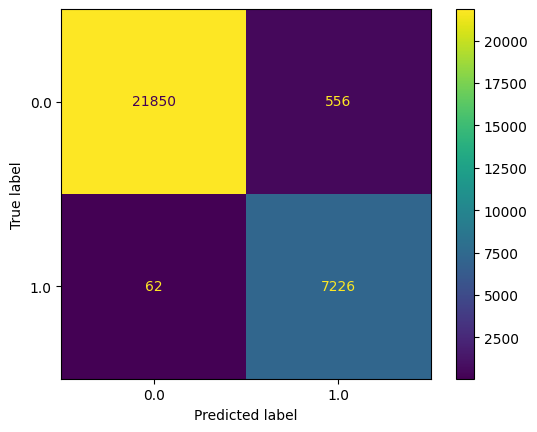

Random Forest Model Metrics:
Accuracy:  0.9791877146898363
Precision:  0.9285530711899255
Recall:  0.9914928649835346
F1 score:  0.9589913735899137


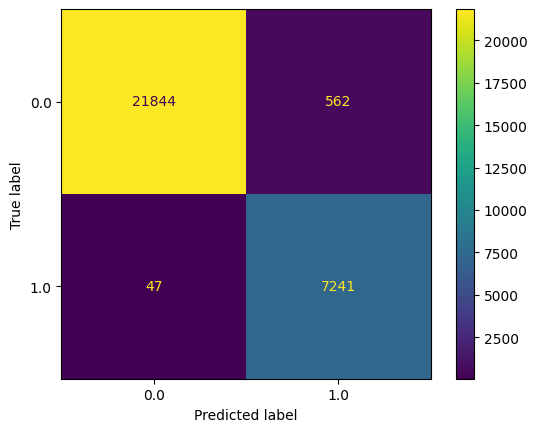

Final Model Metrics:
Accuracy:  0.9794908062234795
Precision:  0.9279764193259002
Recall:  0.9935510428100988
F1 score:  0.9596448214167385


In [67]:
# Random Forest Model
ConfusionMatrixDisplay.from_predictions(val_y, predict_2)
plt.show()
print("Random Forest Model Metrics:")
print("Accuracy: ", accuracy_score(val_y, predict_2))
print("Precision: ", precision_score(val_y, predict_2))
print("Recall: ", recall_score(val_y, predict_2))
print("F1 score: ", f1_score(val_y, predict_2))

# Final Model
ConfusionMatrixDisplay.from_predictions(val_y, final_predictions)
plt.show()
print("Final Model Metrics:")
print("Accuracy: ", accuracy_score(val_y, final_predictions))
print("Precision: ", precision_score(val_y, final_predictions))
print("Recall: ", recall_score(val_y, final_predictions))
print("F1 score: ", f1_score(val_y, final_predictions))

In [68]:
# Comparison

accuracy_improvement = (accuracy_score(val_y, final_predictions) - accuracy_score(val_y, predict_2))
print("Accuracy improvement:", 100*accuracy_improvement, "%")

precision_improvement = (precision_score(val_y, final_predictions) - precision_score(val_y, predict_2))
print("Precision improvement:", 100*precision_improvement, "%")

recall_improvement = (recall_score(val_y, final_predictions) - recall_score(val_y, predict_2))
print("Recall improvement:", 100*recall_improvement, "%")

f1_improvement = (f1_score(val_y, final_predictions) - f1_score(val_y, predict_2))
print("F1 improvement:", 100*f1_improvement, "%")

Accuracy improvement: 0.030309153364316277 %
Precision improvement: -0.057665186402522384 %
Recall improvement: 0.20581778265641448 %
F1 improvement: 0.0653447826824749 %
